<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_style("darkgrid")
sns.set_palette(['grey'])

#### Read the dataset in the csv file from the URL


In [20]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become Familiar with the Dataset

#### Dataset Overview

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

##### Dataset

In [21]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Dropping Unnecessary Column

In [22]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Task 2: Generate Descriptive Statistics and Visualizations

#### Descriptive Statistics of the Data Set

In [24]:
boston_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### "Median Value of Owner-Occupied Homes" - Boxplot

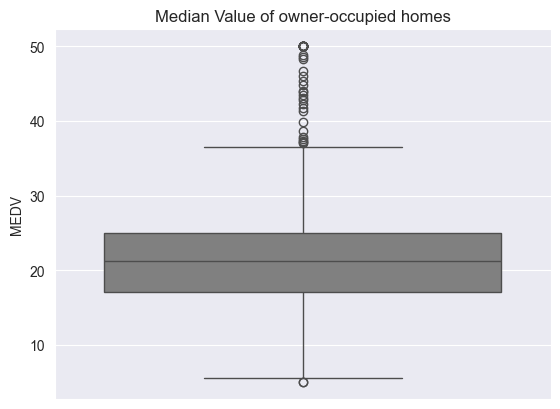

In [25]:
sns.boxplot(boston_df.MEDV)
pyplot.title("Median Value of owner-occupied homes")
pyplot.show()

#### Barplot for the Charles river variable

Text(0.5, 1.0, 'Residence Near Charles River')

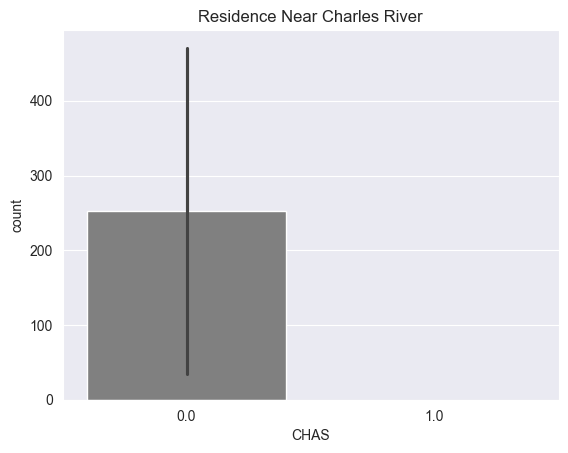

In [26]:
sns.barplot(x = boston_df.CHAS, y= boston_df.CHAS.value_counts())
pyplot.title("Residence Near Charles River")

#### Boxplot for the MEDV variable vs the Age Variable

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

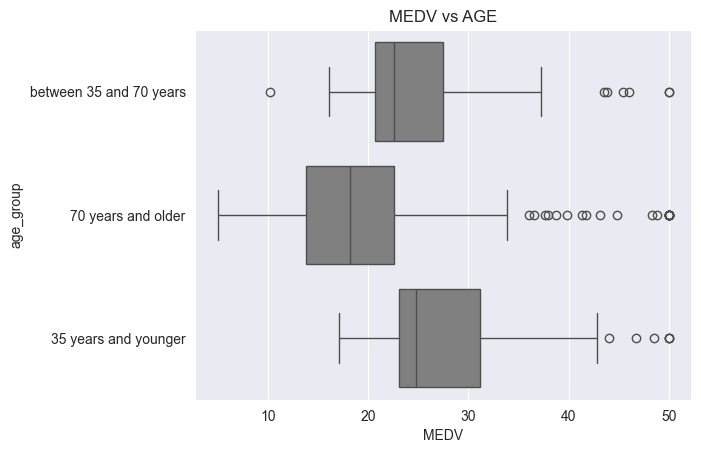

In [28]:
sns.boxplot(y = boston_df.age_group, x = boston_df.MEDV)
pyplot.title("MEDV vs AGE")
pyplot.show()

#### Scatter plot to show the relation between Nitric Oxide concentration and the proportion of non-retail business acres per town.

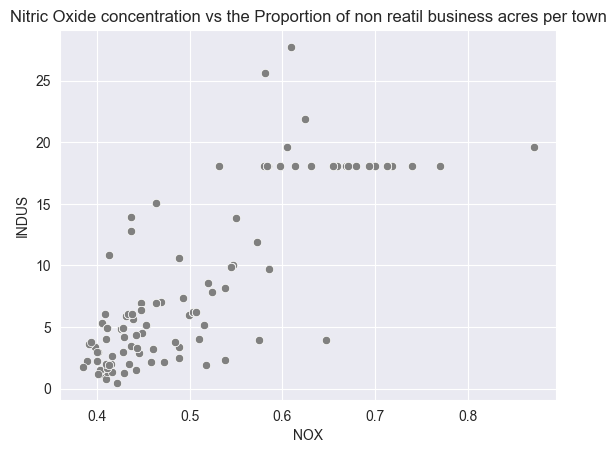

In [29]:
sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS)
pyplot.title("Nitric Oxide concentration vs the Proportion of non reatil business acres per town")
pyplot.show()

I can see there's a linear relationship between this two variable

#### Histogram for the pupil to teacher ratio variable

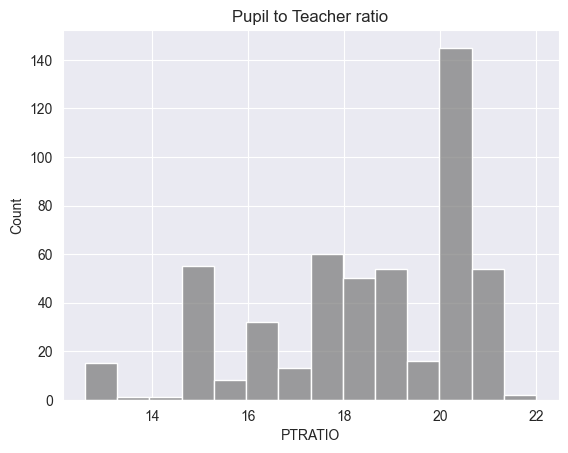

In [30]:
sns.histplot(boston_df.PTRATIO)
pyplot.title("Pupil to Teacher ratio")
pyplot.show()

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

<p><i><b>H<sub>0</sub></b></i> = There is no significant statistical difference between variables.</p>
<p><i><b>H<sub>a</sub></b></i> = There is significant statistical difference between variables.</p>

Using Levene's test

In [31]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Using <code>ttest_ind</code> from <code>scipy_stats</code>

In [32]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var= True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Here, the p_value is less than 0.005, so there's enough evidence to reject the null hypothesis.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

<p><i><b>H<sub>0</sub></b></i> = There is no significant statistical difference between variables.</p>
<p><i><b>H<sub>a</sub></b></i> = There is significant statistical difference between variables.</p>

In [34]:
older_than_eighty = boston_df[boston_df['AGE']>=80]['MEDV']
younger_than_eighty = boston_df[boston_df['AGE']< 80]['MEDV']

In [35]:
f_statistic, p_value = scipy.stats.f_oneway(older_than_eighty, younger_than_eighty)
print("F_statistic: {0}, P-value: {1}".format(f_statistic, p_value))

F_statistic: 70.44779821320425, P-value: 4.804129407443654e-16


Here, the p_value is less than 0.005, so there's enough evidence to reject the null hypothesis.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

<p><i><b>H<sub>0</sub></b></i> = There is no significant statistical difference between variables.</p>
<p><i><b>H<sub>a</sub></b></i> = There is significant statistical difference between variables.</p>

In [37]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

P value is less than 0.005, so we can say that there is a existing relationship between variables

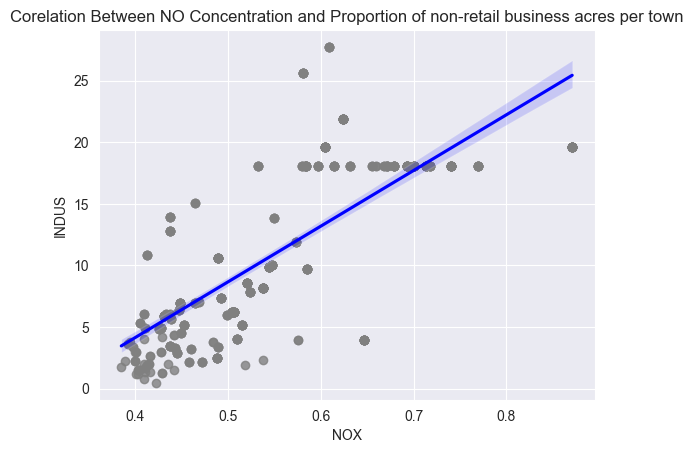

In [40]:
sns.regplot(x=boston_df['NOX'], y = boston_df['INDUS'], line_kws={'color': 'blue'})
pyplot.title("Corelation Between NO Concentration and Proportion of non-retail business acres per town")
pyplot.show()

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<p><i><b>H<sub>0</sub></b></i> = There is no significant statistical difference between variables.</p>
<p><i><b>H<sub>a</sub></b></i> = There is significant statistical difference between variables.</p>

In [49]:
X = boston_df['DIS']
y = boston_df['AGE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     639.7
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           9.86e-92
Time:                        20:51:16   Log-Likelihood:                -2198.9
No. Observations:                 506   AIC:                             4402.
Df Residuals:                     504   BIC:                             4410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.5161      1.715     62.103      0.000     103.146     109.886
DIS           -9.9976      0.395    -25.292      0.000     -10.774      -9.221
==============================================================================
Omnibus:                       17.596   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.076
Skew:                          -0.329   Prob(JB):                     9.75e-06
Kurtosis:                       3.813   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the coef = -9.9976 and p is < 0.005, so we can reject the null hypothesis and we can say there is an impact on the median value of owner occupied homes.